In [20]:
import io
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [21]:
embedding_layer = layers.Embedding(1000, 5)

In [22]:
result = embedding_layer(tf.constant([1,2,3]))

In [23]:
result.numpy()

array([[ 0.01094275, -0.00275149, -0.03509312,  0.02628541, -0.01755869],
       [-0.01700958, -0.04539173,  0.00942742, -0.00420091, -0.0029459 ],
       [-0.03895913,  0.0322795 ,  0.04323373,  0.04171831,  0.03442532]],
      dtype=float32)

In [24]:
result.numpy().shape

(3, 5)

In [25]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                                         split=(tfds.Split.TRAIN, tfds.Split.TEST),
                                          with_info=True, as_supervised=True)

In [26]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [27]:
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

In [28]:
embedding_dim = 16

In [29]:
model = keras.Sequential([
    layers.Embedding(encoder.vocab_size, embedding_dim),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1, activation='sigmoid')
])

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])

In [31]:
history = model.fit(train_batches, epochs=10, validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 30s 12ms/step - loss: 0.6376 - accuracy: 0.6998 - val_loss: 0.5508 - val_accuracy: 0.8250
Epoch 2/10
2500/2500 [==============================] - 27s 11ms/step - loss: 0.4659 - accuracy: 0.8375 - val_loss: 0.4166 - val_accuracy: 0.8550
Epoch 3/10
2500/2500 [==============================] - 28s 11ms/step - loss: 0.3642 - accuracy: 0.8772 - val_loss: 0.3877 - val_accuracy: 0.8450
Epoch 4/10
2500/2500 [==============================] - 34s 14ms/step - loss: 0.3097 - accuracy: 0.8954 - val_loss: 0.3784 - val_accuracy: 0.8650
Epoch 5/10
2500/2500 [==============================] - 34s 14ms/step - loss: 0.2746 - accuracy: 0.9075 - val_loss: 0.4049 - val_accuracy: 0.8150
Epoch 6/10
2500/2500 [==============================] - 30s 12ms/step - loss: 0.2514 - accuracy: 0.9155 - val_loss: 0.4186 - val_accuracy: 0.8550
Epoch 7/10
2500/2500 [==============================] - 31s 12ms/step - loss: 0.2329 - accuracy: 0.9225 - val_loss: 0.3345 -

In [32]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

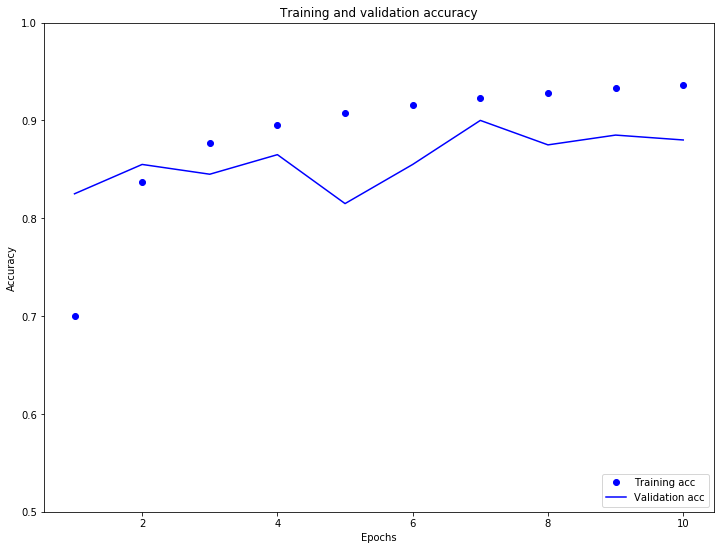

In [33]:
plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5, 1))

plt.show()

In [34]:
def get_batch_data():
    (train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                                         split=(tfds.Split.TRAIN, tfds.Split.TEST),
                                          with_info=True, as_supervised=True)
    encoder = info.features['text'].encoder
    padded_shapes = ([None],())
    train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
    test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
    
    return train_batches, test_batches, encoder

In [35]:
def get_model(encoder, embedding_dim = 16):
    model = keras.Sequential([
        layers.Embedding(encoder.vocab_size, embedding_dim),
        layers.GlobalAveragePooling1D(),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
             metrics=['accuracy'])
    
    return model

In [36]:
def plot_history(history):
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12,9))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim((0.5, 1))
    
    plt.show()

In [37]:
def retrieve_embeddings(model, encoder):
    out_vectors = io.open('vecs.tsv', 'w', encoding='utf-8')
    out_metadata = io.open('meta.tsv', 'w', encoding='utf-8')
    weights = model.layers[0].get_weights()[0]
    
    for num, word in enumerate(encoder.subwords):
        vec = weights[num+1]
        out_metadata.write(word + '\n')
        out_vectors.write('\t'.join([str(x) for x in vec]) + '\n')
        
    out_vectors.close()
    out_metadata.close()

Epoch 1/10
2500/2500 [==============================] - 33s 13ms/step - loss: 0.6348 - accuracy: 0.6960 - val_loss: 0.5562 - val_accuracy: 0.7150
Epoch 2/10
2500/2500 [==============================] - 26s 10ms/step - loss: 0.4629 - accuracy: 0.8371 - val_loss: 0.4200 - val_accuracy: 0.8500
Epoch 3/10
2500/2500 [==============================] - 26s 10ms/step - loss: 0.3596 - accuracy: 0.8794 - val_loss: 0.4474 - val_accuracy: 0.8400
Epoch 4/10
2500/2500 [==============================] - 26s 11ms/step - loss: 0.3056 - accuracy: 0.8964 - val_loss: 0.3181 - val_accuracy: 0.8850
Epoch 5/10
2500/2500 [==============================] - 26s 10ms/step - loss: 0.2737 - accuracy: 0.9086 - val_loss: 0.3840 - val_accuracy: 0.8550
Epoch 6/10
2500/2500 [==============================] - 23s 9ms/step - loss: 0.2480 - accuracy: 0.9162 - val_loss: 0.3421 - val_accuracy: 0.8650
Epoch 7/10
2500/2500 [==============================] - 23s 9ms/step - loss: 0.2297 - accuracy: 0.9228 - val_loss: 0.2800 - v

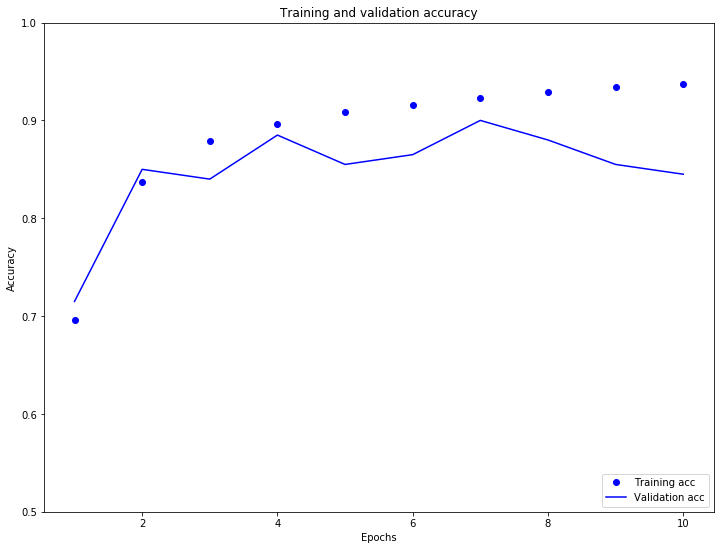

In [38]:
train_batches, test_batches, encoder = get_batch_data()
model = get_model(encoder)
history = model.fit(train_batches, epochs=10, validation_data=test_batches, validation_steps=20)
plot_history(history)
retrieve_embeddings(model, encoder)

http://projector.tensorflow.org/